In [1]:
from pathlib import Path
import pandas as pd
from bluemira.base.file import get_bluemira_path
from bluemira.equilibria.diagnostics import EqDiagnosticOptions
from bluemira.equilibria.analysis import select_eq, EqAnalysis, MultiEqAnalysis

#from step_reactor.equilibria.plasma_vibes import (
#    plot_equilibria_with_profiles,
 #   select_eq,
 #   EquilibriaComparisionPair, 
 #   EquilibriaComparisionMulti,
#)

%pdb

Automatic pdb calling has been turned ON


In [2]:
pwd

'/home/ggraham/code/bluemira/examples/equilibria'

In [3]:
#FIXME
ref_path = Path("../../tests/equilibria/test_data/SH_test_file.json")
ref_eq = select_eq(ref_path)
eq_path = Path("../../tests/equilibria/test_data/eqref_OOB.json")
eq = select_eq(eq_path, from_cocos=7)

eqdsk contains no qpsi data, but `qpsi_sign` provided. Setting qpsi to array of -1's.


In [4]:
diag_ops = EqDiagnosticOptions(
    psi_diff=True, split_psi_plots=False, reference_eq=ref_eq,
)

analysis = EqAnalysis(diag_ops, eq)

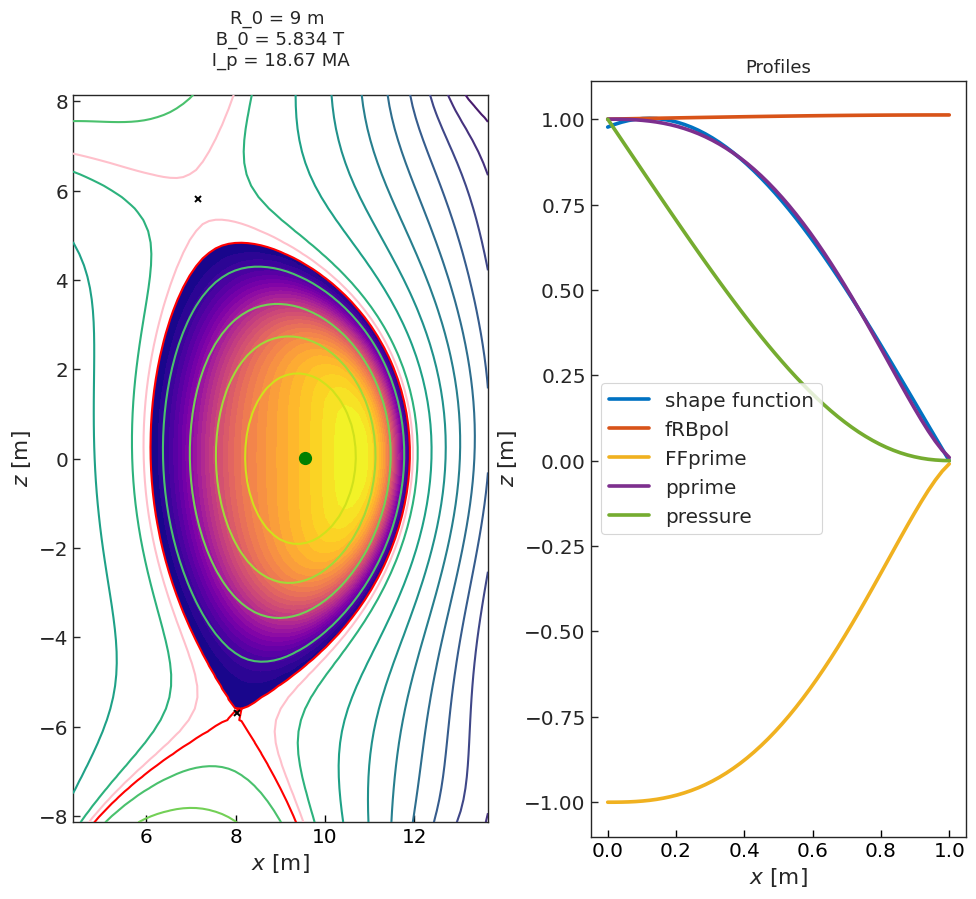

(<Axes: title={'center': 'R_0 = 9 m \n B_0 = 5.834 T \n I_p = 18.67 MA \n'}, xlabel='$x$ [m]', ylabel='$z$ [m]'>,
 <Axes: title={'center': 'Profiles'}, xlabel='$x$ [m]', ylabel='$z$ [m]'>)

In [5]:
analysis.plot_equilibria_with_profiles()

+-------------------------------------------------------------------------+
| WARNING: x_min should be < x_max 4.35 > 2.00. Switching x_min and       |
| x_max.                                                                  |
+-------------------------------------------------------------------------+


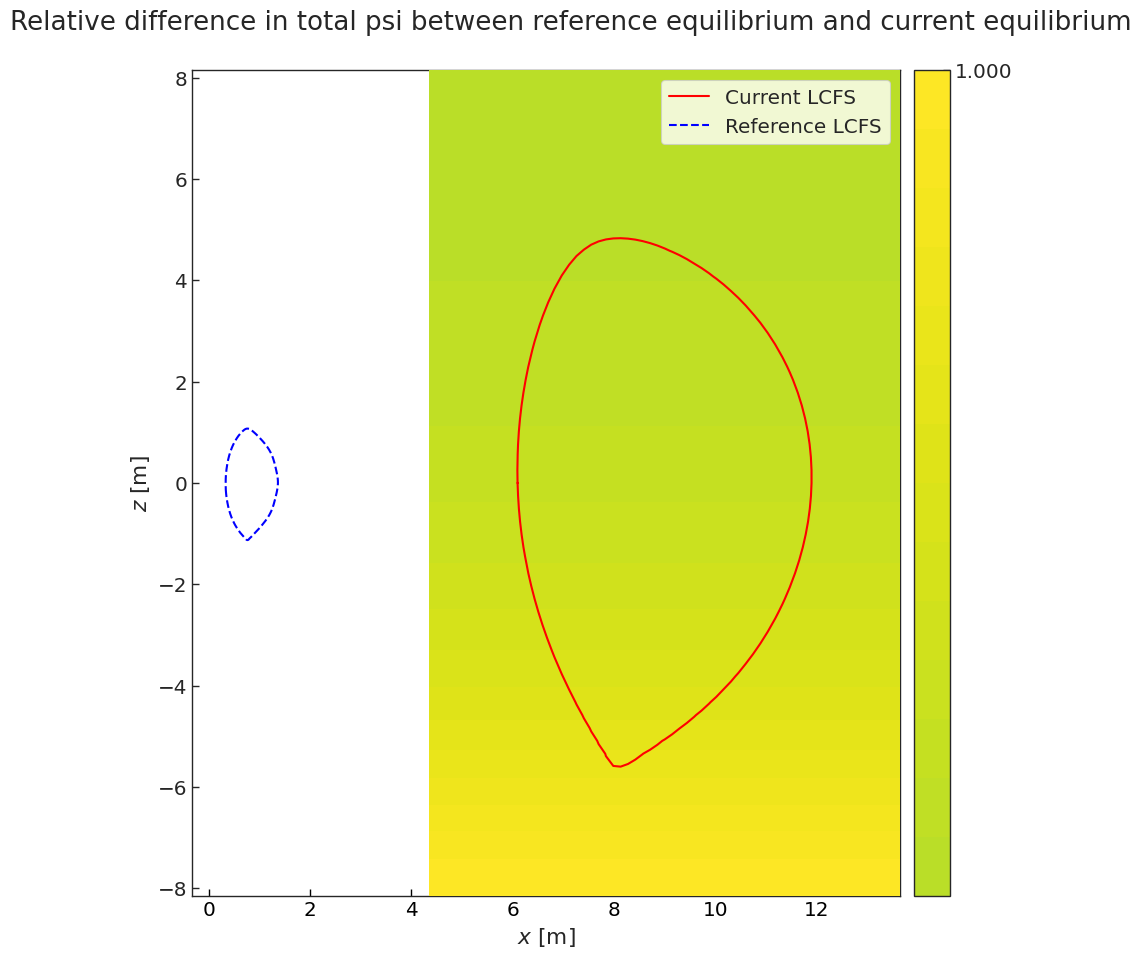

In [6]:
analysis.plot_compare_psi()

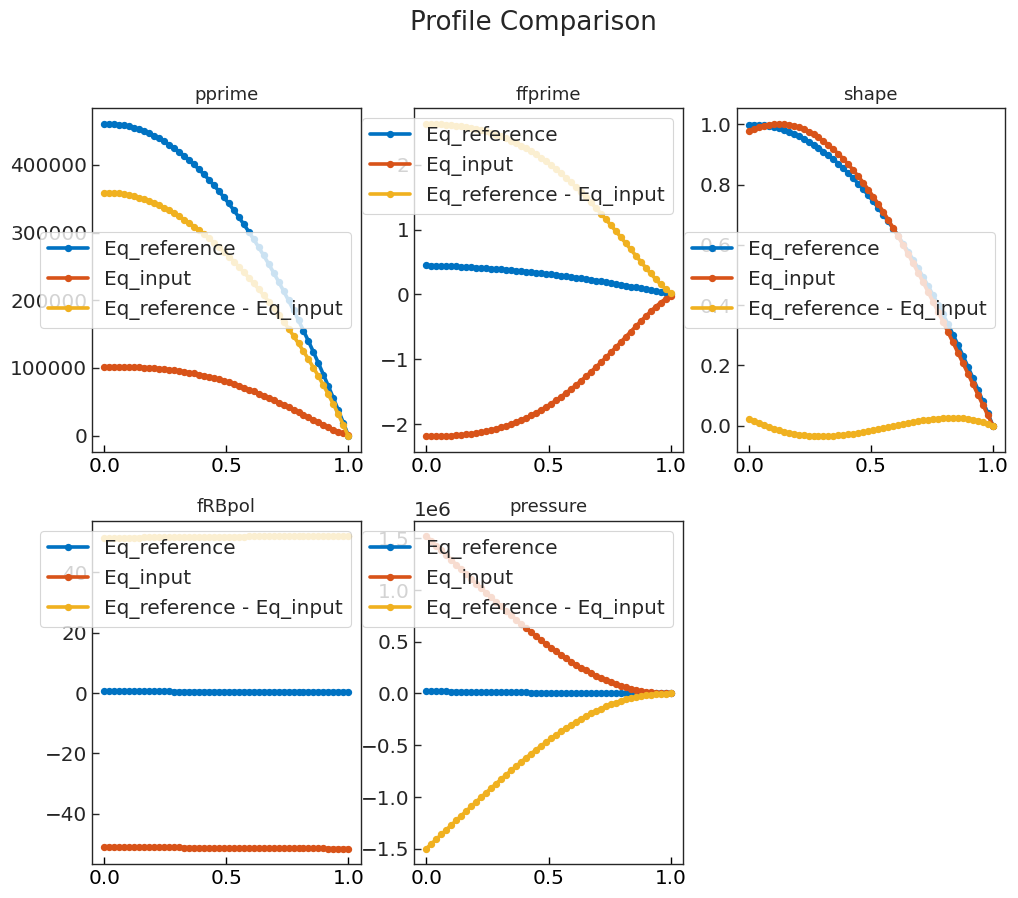

In [7]:
analysis.plot_compare_profiles()

In [8]:
p1 = ref_path
p2 = eq_path

equilibrium_names = ['MASTy Eq', 'DEMOish Eq']

multi_analysis = MultiEqAnalysis([p1, p2], equilibrium_names=equilibrium_names, from_cocos=[3, 7])

eqdsk contains no qpsi data, but `qpsi_sign` provided. Setting qpsi to array of -1's.
eqdsk contains no qpsi data, but `qpsi_sign` provided. Setting qpsi to array of -1's.


In [9]:
pd = multi_analysis.coilset_info_table()

In [10]:
pd.style.set_caption("Current (MA)")

,MASTy Eq,DEMOish Eq
PF_25,0.007629,nan
PF_26,0.081682,nan
PF_27,0.018867,nan
PF_28,0.133849,nan
PF_29,0.056394,nan
PF_30,-0.018880,nan
PF_31,-0.113417,nan
PF_32,-0.123425,nan
PF_33,-0.015075,nan
PF_34,0.012076,nan


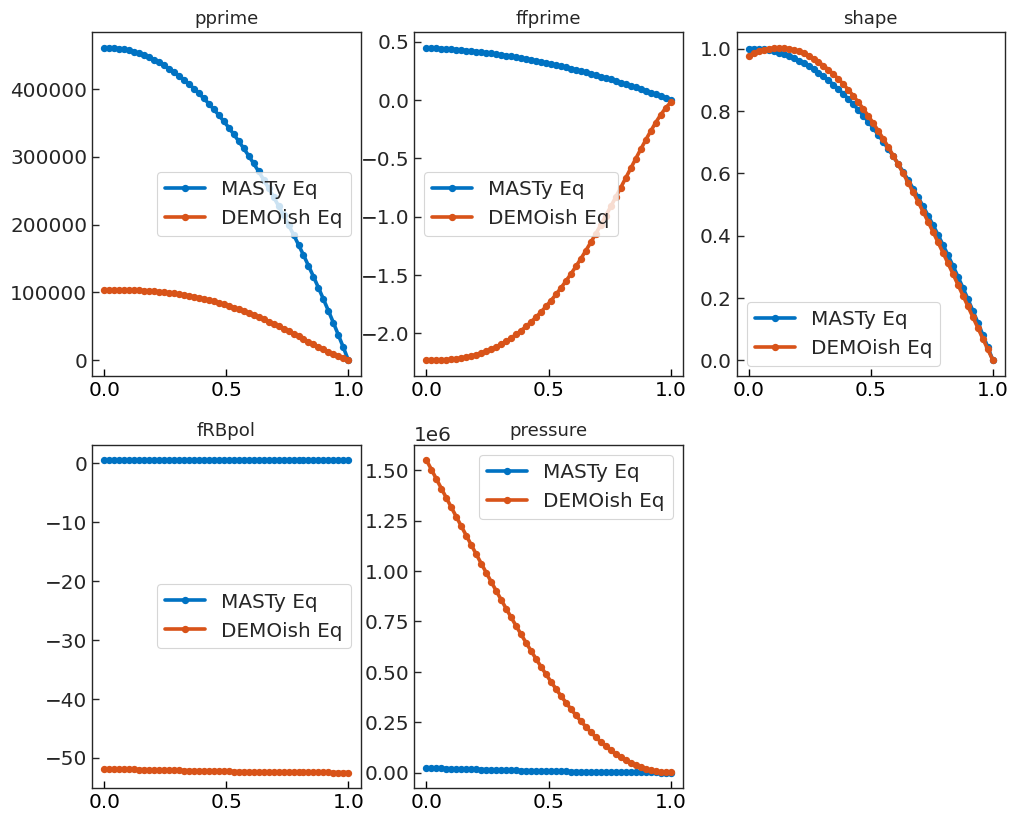

(<Axes: title={'center': 'pprime'}>,
 <Axes: title={'center': 'ffprime'}>,
 <Axes: title={'center': 'fRBpol'}>,
 <Axes: title={'center': 'pressure'}>,
 <Axes: title={'center': 'shape'}>,
 <Axes: >)

In [11]:
multi_analysis.plot_compare_profiles()